MIT License

Copyright (c) 2021 kosta994

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

---

In [305]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio
import pandas as pd

from fsvc_watermarking import fsvc_watermark_embedding, fsvc_watermark_detection
from patchwork_multylayer_watermarking import patchwork_multilayer_watermark_embedding, patchwork_multilayer_watermark_detection
from norm_space_watermarking import norm_space_watermark_embedding, norm_space_watermark_detection
from dct_watermarking import get_watermark_lenght, dctb1_watermark_embedding, dctb1_watermark_detection
import warnings
warnings.filterwarnings("ignore")

In [306]:
def calculate_ber(watermark, watermark_detected):
  return np.sum(watermark != watermark_detected)/len(watermark)

# following function calaculate the SNR from the original and watermarked signal
def calculate_snr(original_signal, watermarked_signal):
  noise = original_signal - watermarked_signal
  return 10*np.log10(np.sum(original_signal**2)/np.sum(noise**2))

In [307]:
# dictionary to compare the different watermarking methods
watermarking_methods = {
    'fsvc': {
        'SNR [dB]': 0,
        'BER [%]': 0
    },
    'patchwork': {
        'SNR [dB]': 0,
        'BER [%]': 0
    },
    'norm_space': {
        'SNR [dB]': 0,
        'BER [%]': 0
    },
    'dct': {
        'SNR [dB]': 0,
        'BER [%]': 0
    }
}


In [308]:
# Import recorded speech signals
fs_hamlet, hamlet_en = wavfile.read('audios/Hamlet_EN.wav')
hamlet_en = np.mean(hamlet_en, axis=1)[fs_hamlet*1:fs_hamlet*5]
t_hamlet = np.arange(0, 4, 1/fs_hamlet)
print('Hamlet_EN.wav: ', hamlet_en.shape, fs_hamlet)

Hamlet_EN.wav:  (192000,) 48000


In [309]:
Audio(hamlet_en, rate=fs_hamlet)

### FSVC

In [310]:
# Create a sine wave signal as test signal and an alternating bit sequence as watermark
fs = 44100
t = np.arange(0, 2, 1/fs)
test_signal = np.sin(2*np.pi*441*t)

In [311]:
watermark_fsvc = np.tile(np.array([1, 0]), 1024)

watermarked_signal_fsvc = fsvc_watermark_embedding(test_signal, watermark_fsvc, sr=fs)

detected_watermark_fsvc = fsvc_watermark_detection(watermarked_signal_fsvc, sr=fs)

print(f"BER = {calculate_ber(watermark_fsvc, detected_watermark_fsvc)*100:.2f}%")
print(f"SNR = {calculate_snr(test_signal, watermarked_signal_fsvc):.2f} dB")

BER = 0.05%
SNR = 42.00 dB


In [312]:
# Play original signal
Audio(data=test_signal, rate=fs)

In [313]:
# Play watermarked signal
Audio(data=watermarked_signal_fsvc, rate=fs)

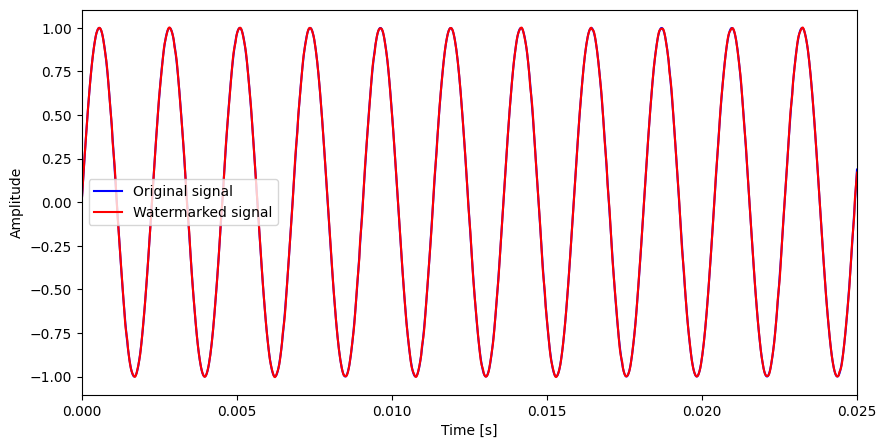

In [314]:
# Plot original and watermarked signal
plt.figure(figsize=(10, 5))
plt.plot(t, test_signal, label="Original signal", color=(0, 0, 1.0, 1.0))
plt.plot(t, watermarked_signal_fsvc, label="Watermarked signal", color=(1.0, 0, 0, 1.0))
plt.xlim(0, 0.025)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

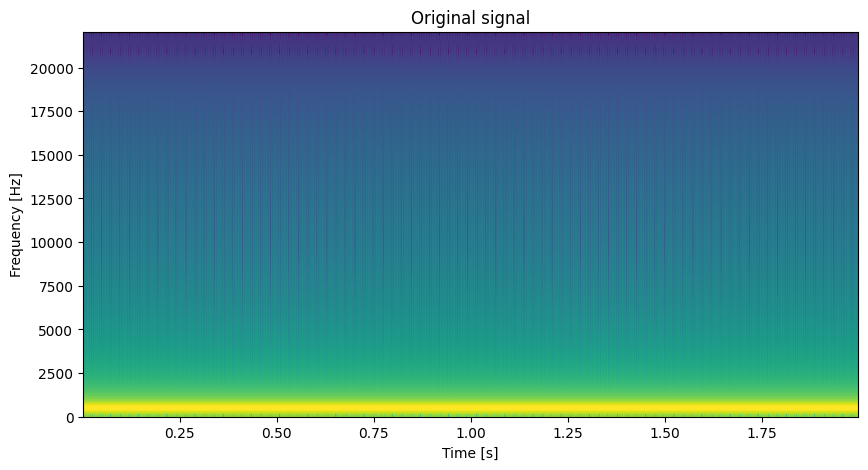

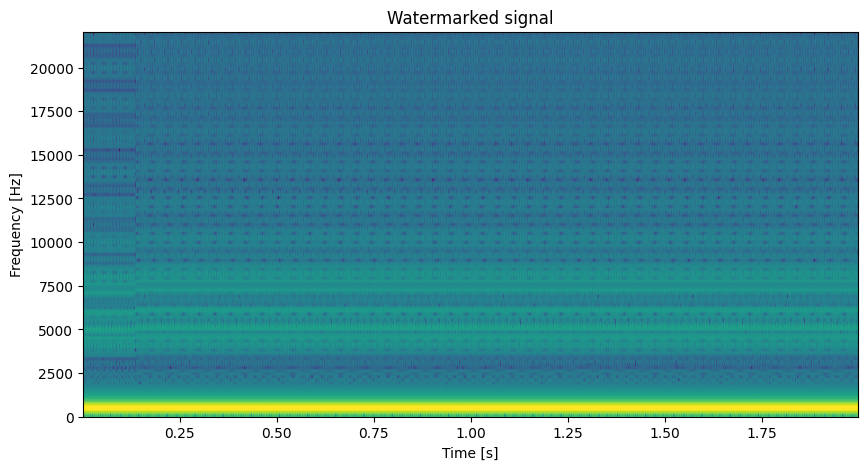

In [315]:
# Plot spectrogram of original and watermarked signal
plt.figure(figsize=(10, 5))
plt.specgram(test_signal, Fs=fs)
plt.title("Original signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

plt.figure(figsize=(10, 5))
plt.specgram(watermarked_signal_fsvc, Fs=fs)
plt.title("Watermarked signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

In [316]:
watermark_fsvc = np.tile(np.array([1, 0]), 4096)

watermarked_signal_fsvc = fsvc_watermark_embedding(hamlet_en, watermark_fsvc, sr=fs_hamlet)

detected_watermark_fsvc = fsvc_watermark_detection(watermarked_signal_fsvc, sr=fs_hamlet)

print(f"BER = {calculate_ber(watermark_fsvc, detected_watermark_fsvc)*100:.2f}%")
watermarking_methods['fsvc']['BER [%]'] = calculate_ber(watermark_fsvc, detected_watermark_fsvc)*100
print(f"SNR = {calculate_snr(hamlet_en, watermarked_signal_fsvc):.2f} dB")
watermarking_methods['fsvc']['SNR [dB]'] = calculate_snr(hamlet_en, watermarked_signal_fsvc)

BER = 0.01%
SNR = 31.01 dB


In [317]:
# Play watermarked signal
Audio(data=watermarked_signal_fsvc, rate=fs_hamlet)

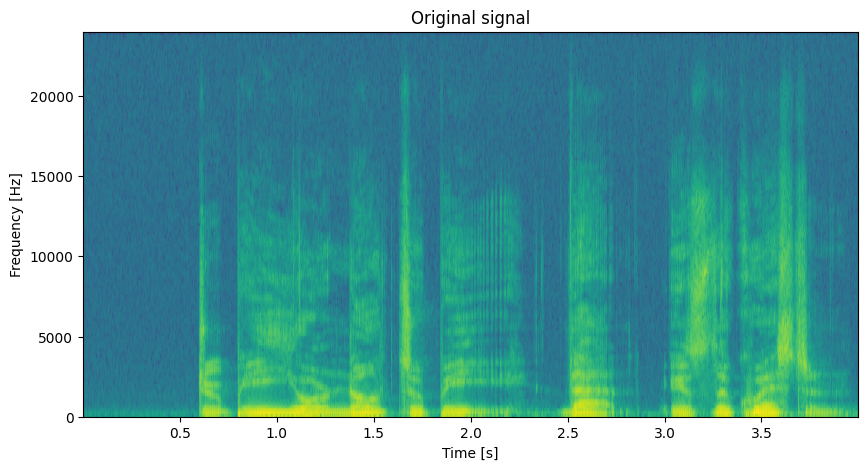

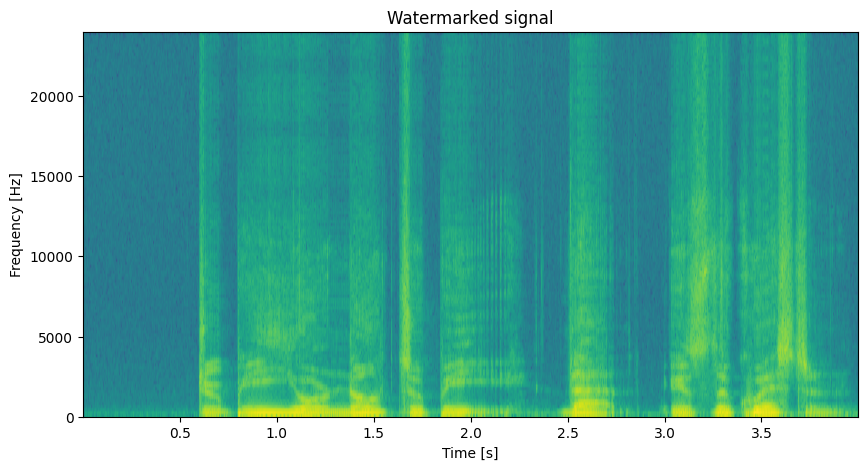

In [318]:
# Plot spectrogram of original and watermarked signal
plt.figure(figsize=(10, 5))
plt.specgram(hamlet_en, Fs=fs_hamlet)
plt.title("Original signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

plt.figure(figsize=(10, 5))
plt.specgram(watermarked_signal_fsvc, Fs=fs_hamlet)
plt.title("Watermarked signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

### Patchwork

In [319]:
# Create a sine wave signal as test signal and an alternating bit sequence as watermark
fs = 16000
t = np.arange(0, 2, 1/fs)
test_signal = np.sin(2*np.pi*500*t)

In [320]:
watermark_patch = np.tile(np.array([1, 0]), 1024)

watermarked_signal_patch = patchwork_multilayer_watermark_embedding(signal=test_signal, watermark=watermark_patch, sr=fs)

detected_watermark_patch = patchwork_multilayer_watermark_detection(watermarked_signal=watermarked_signal_patch, watermark_length=len(watermark_patch), sr=fs)

print(f"BER = {calculate_ber(watermark_patch, detected_watermark_patch)*100:.2f}%")

BER = 0.00%


In [321]:
# Play original signal
Audio(data=test_signal, rate=fs)

In [322]:
# Play watermarked signal
Audio(data=watermarked_signal_patch, rate=fs)

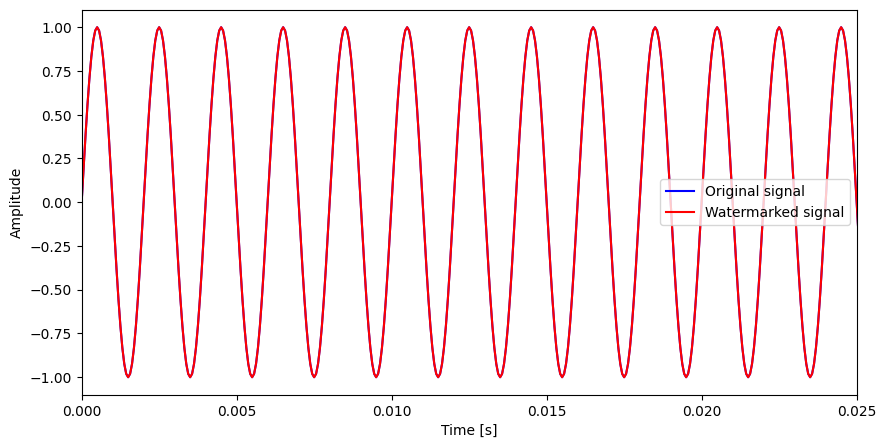

In [323]:
# Plot original and watermarked signal
plt.figure(figsize=(10, 5))
plt.plot(t, test_signal, label="Original signal", color=(0, 0, 1.0, 1.0))
plt.plot(t, watermarked_signal_patch, label="Watermarked signal", color=(1.0, 0, 0, 1.0))
plt.xlim(0, 0.025)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

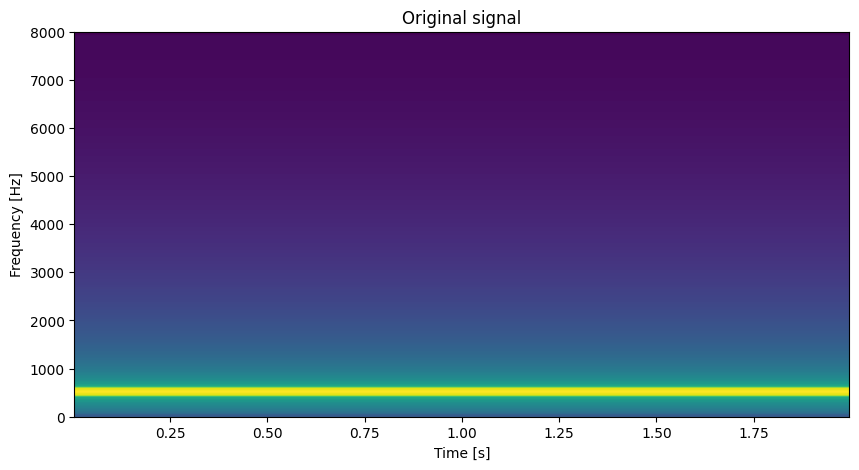

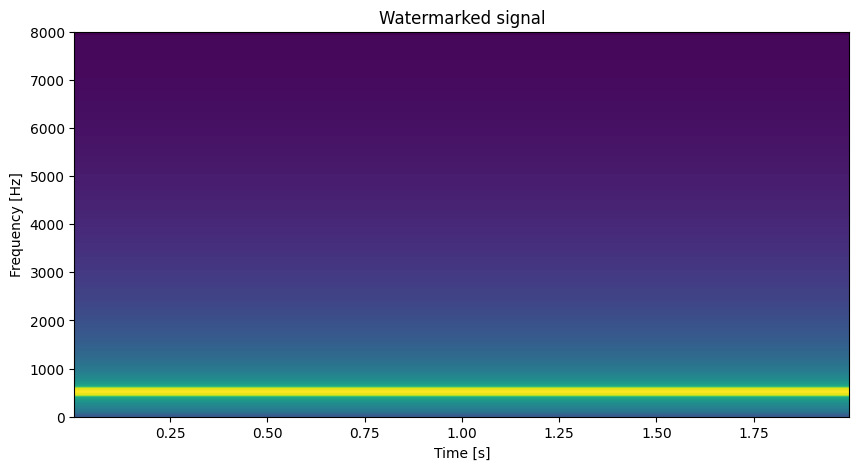

In [324]:
# Plot spectrogram of original and watermarked signal
plt.figure(figsize=(10, 5))
plt.specgram(test_signal, Fs=fs)
plt.title("Original signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

plt.figure(figsize=(10, 5))
plt.specgram(watermarked_signal_patch, Fs=fs)
plt.title("Watermarked signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

In [325]:
watermark_patch = np.tile(np.array([1, 0]), 2**10)

watermarked_signal_patch = patchwork_multilayer_watermark_embedding(signal=hamlet_en, watermark=watermark_patch, sr=fs_hamlet)

detected_watermark_patch = patchwork_multilayer_watermark_detection(watermarked_signal=watermarked_signal_patch, watermark_length=len(watermark_patch), sr=fs_hamlet)

print(f"BER = {calculate_ber(watermark_patch, detected_watermark_patch)*100:.2f}%")
watermarking_methods['patchwork']['BER [%]'] = calculate_ber(watermark_patch, detected_watermark_patch)*100
print(f"SNR = {calculate_snr(hamlet_en, watermarked_signal_patch):.2f} dB")
watermarking_methods['patchwork']['SNR [dB]'] = calculate_snr(hamlet_en, watermarked_signal_patch)

BER = 23.73%
SNR = 34.51 dB


In [326]:
Audio(hamlet_en, rate=fs_hamlet)

In [327]:
Audio(watermarked_signal_patch, rate=fs_hamlet)

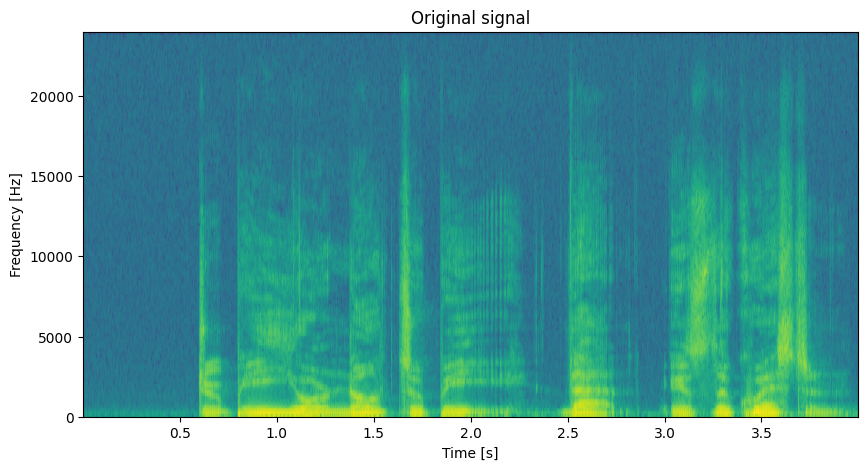

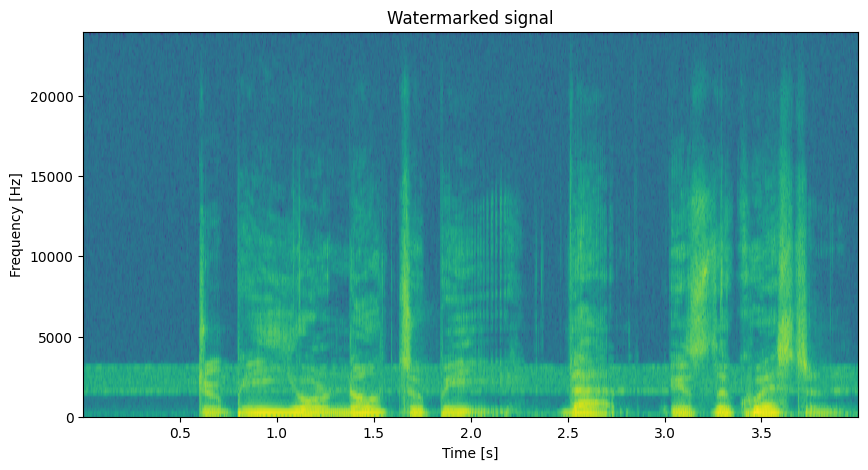

In [328]:
# Plot spectrogram of original and watermarked signal
plt.figure(figsize=(10, 5))
plt.specgram(hamlet_en, Fs=fs_hamlet)
plt.title("Original signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

plt.figure(figsize=(10, 5))
plt.specgram(watermarked_signal_patch, Fs=fs_hamlet)
plt.title("Watermarked signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

### Norm Space

In [329]:
watermark_ns = np.tile(np.array([1, 0]), len(test_signal)//8)

watermarked_signal_ns = norm_space_watermark_embedding(signal=test_signal, watermark=watermark_ns, delta=0.01)

detected_watermark_ns = norm_space_watermark_detection(watermarked_signal=watermarked_signal_ns, watermark_length=len(watermark_ns), delta=0.01)

print(f"BER = {calculate_ber(watermark_ns, detected_watermark_ns)*100:.2f}%")

BER = 0.00%


In [330]:
# Play original signal
Audio(data=test_signal, rate=fs)

In [331]:
# Play watermarked signal
Audio(data=watermarked_signal_ns, rate=fs)

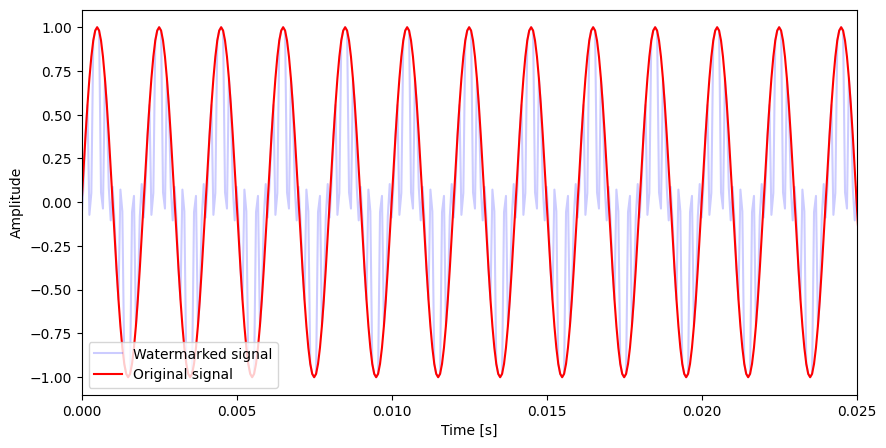

In [332]:
# Plot original and watermarked signal
plt.figure(figsize=(10, 5))
plt.plot(t, watermarked_signal_ns, label="Watermarked signal", color=(0.0, 0, 1.0, 0.2))
plt.plot(t, test_signal, label="Original signal", color=(1.0, 0, 0, 1.0))
plt.xlim(0, 0.025)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

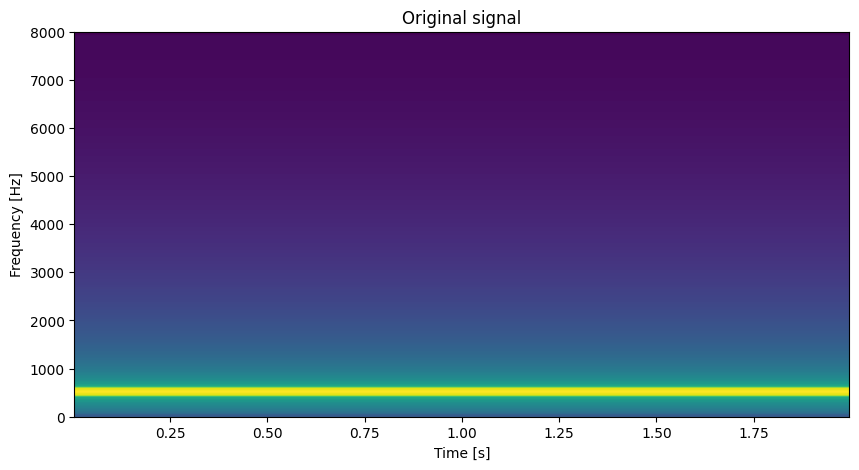

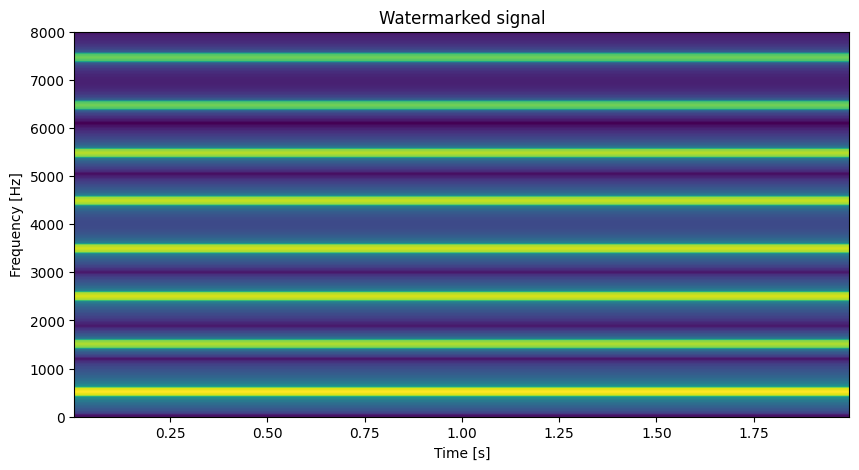

In [333]:
# Plot spectrogram of original and watermarked signal
plt.figure(figsize=(10, 5))
plt.specgram(test_signal, Fs=fs)
plt.title("Original signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

plt.figure(figsize=(10, 5))
plt.specgram(watermarked_signal_ns, Fs=fs)
plt.title("Watermarked signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

In [334]:
watermark_ns = np.tile(np.array([1, 0]), len(hamlet_en)//16)

watermarked_signal_ns = norm_space_watermark_embedding(signal=hamlet_en, watermark=watermark_ns, delta=0.01)

detected_watermark_ns = norm_space_watermark_detection(watermarked_signal=watermarked_signal_ns, watermark_length=len(watermark_ns), delta=0.01)

print(f"BER = {calculate_ber(watermark_ns, detected_watermark_ns)*100:.2f}%")
watermarking_methods['norm_space']['BER [%]'] = calculate_ber(watermark_ns, detected_watermark_ns)*100
watermarked_signal_ns_snr = np.nan_to_num(watermarked_signal_ns) # to calculate SNR we need to replace NaNs with zeros
print(f"SNR = {calculate_snr(hamlet_en, watermarked_signal_ns):.2f} dB")
watermarking_methods['norm_space']['SNR [dB]'] = calculate_snr(hamlet_en, watermarked_signal_ns_snr)

BER = 0.98%
SNR = nan dB


In [335]:
# Play watermarked signal
Audio(data=watermarked_signal_ns, rate=fs_hamlet)

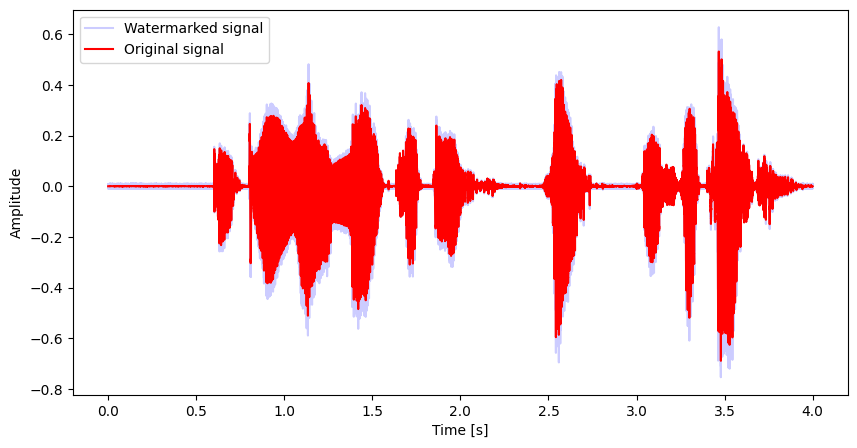

In [336]:
# Plot original and watermarked signal
plt.figure(figsize=(10, 5))
plt.plot(t_hamlet, watermarked_signal_ns, label="Watermarked signal", color=(0.0, 0, 1.0, 0.2))
plt.plot(t_hamlet, hamlet_en, label="Original signal", color=(1.0, 0, 0, 1.0))
# plt.xlim(0, 0.025)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

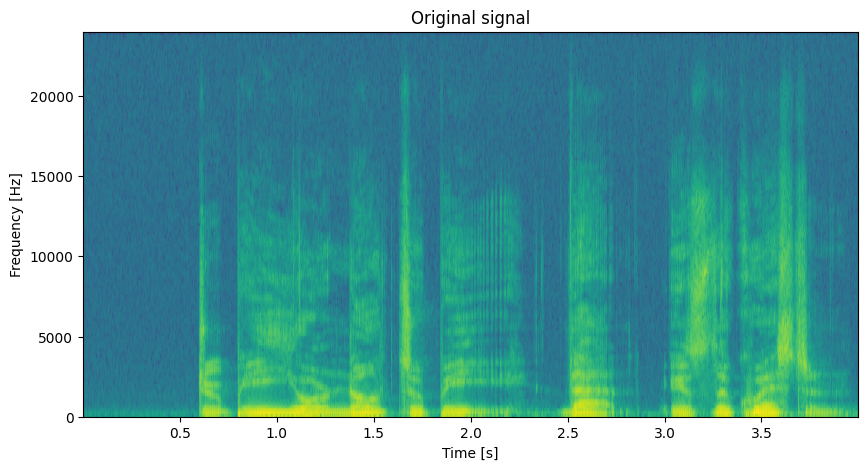

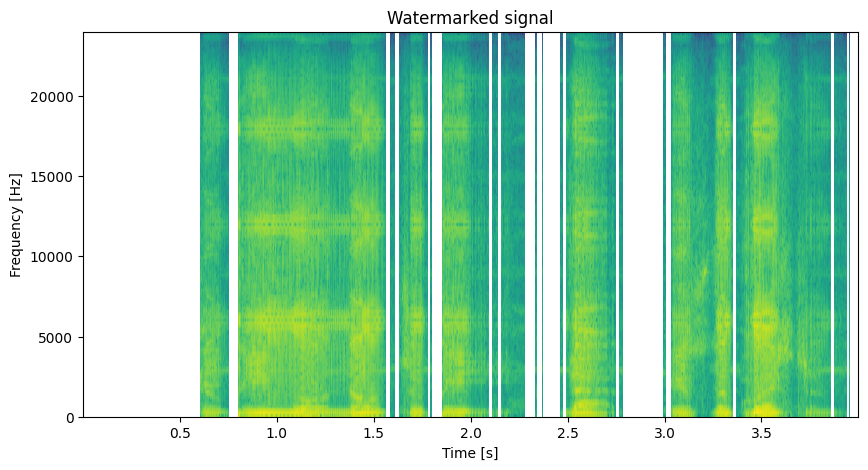

In [337]:
# Plot spectrogram of original and watermarked signal
plt.figure(figsize=(10, 5))
plt.specgram(hamlet_en, Fs=fs_hamlet)
plt.title("Original signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

plt.figure(figsize=(10, 5))
plt.specgram(watermarked_signal_ns, Fs=fs_hamlet)
plt.title("Watermarked signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

### DCT

In [338]:
# Parameters
lt = 23
lw = 1486
lG1 = 24
lG2 = 6
band_size = lG1+lG2

# Create watermark
watermark_lenght_dct = get_watermark_lenght(signal=test_signal, lt=lt, lw=lw, lG1=lG1)
watermark_dct = np.tile(np.array([1, 0]), watermark_lenght_dct//2)

# Embed watermark
watermarked_signal_dct, G1_inds = dctb1_watermark_embedding(signal=test_signal, watermark=watermark_dct, band_size=band_size, lG1=lG1)

# Detect watermark
detected_watermark_dct = dctb1_watermark_detection(watermarked_signal=watermarked_signal_dct, sr=fs, G1_inds=G1_inds, lt=lt, lw=lw, band_size=band_size)

print(f"BER = {calculate_ber(watermark_dct, detected_watermark_dct)*100:.2f}%")

BER = 0.00%


In [339]:
# Play original signal
Audio(data=test_signal, rate=fs)

In [340]:
# Play watermarked signal
Audio(data=watermarked_signal_dct, rate=fs)

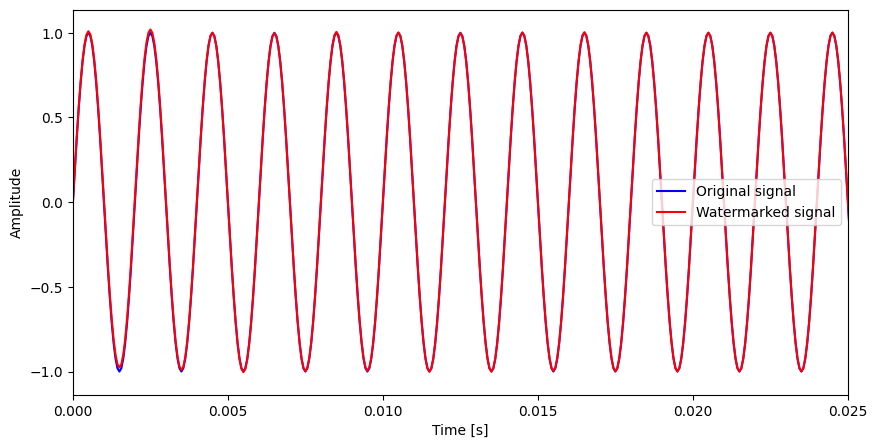

In [341]:
# Plot original and watermarked signal
plt.figure(figsize=(10, 5))
plt.plot(t, test_signal, label="Original signal", color=(0, 0, 1.0, 1.0))
plt.plot(t, watermarked_signal_dct, label="Watermarked signal", color=(1.0, 0, 0, 1.0))
plt.xlim(0, 0.025)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

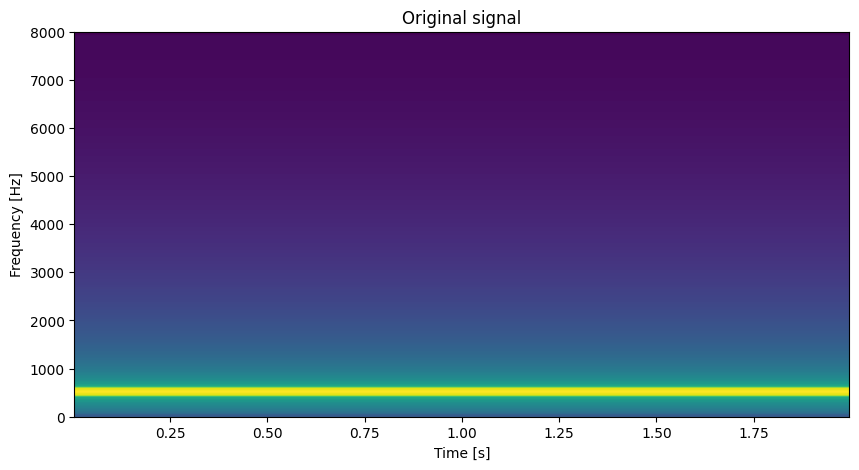

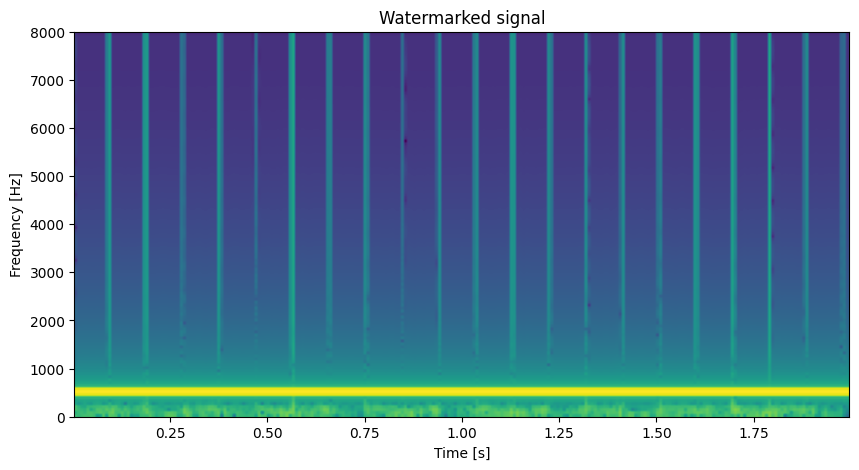

In [342]:
# Plot spectrogram of original and watermarked signal
plt.figure(figsize=(10, 5))
plt.specgram(test_signal, Fs=fs)
plt.title("Original signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

plt.figure(figsize=(10, 5))
plt.specgram(watermarked_signal_dct, Fs=fs)
plt.title("Watermarked signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

In [343]:
# Parameters
lt = 23
lw = 1486
lG1 = 24
lG2 = 6
band_size = lG1+lG2

# Create watermark
watermark_lenght_dct = get_watermark_lenght(signal=hamlet_en, lt=lt, lw=lw, lG1=lG1)
watermark_dct = np.tile(np.array([1, 0]), watermark_lenght_dct//2)

# Embed watermark
watermarked_signal_dct, G1_inds = dctb1_watermark_embedding(signal=hamlet_en, watermark=watermark_dct, sr=fs_hamlet, band_size=band_size, lG1=lG1)

# Detect watermark
detected_watermark_dct = dctb1_watermark_detection(watermarked_signal=watermarked_signal_dct, sr=fs_hamlet, G1_inds=G1_inds, lt=lt, lw=lw, band_size=band_size)

print(f"BER = {calculate_ber(watermark_dct, detected_watermark_dct)*100:.2f}%")
watermarking_methods['dct']['BER [%]'] = calculate_ber(watermark_dct, detected_watermark_dct)*100
print(f"SNR = {calculate_snr(hamlet_en, watermarked_signal_dct):.2f} dB")
watermarking_methods['dct']['SNR [dB]'] = calculate_snr(hamlet_en, watermarked_signal_dct)

BER = 0.56%
SNR = 13.12 dB


In [344]:
# Play watermarked signal
Audio(data=watermarked_signal_dct, rate=fs_hamlet)

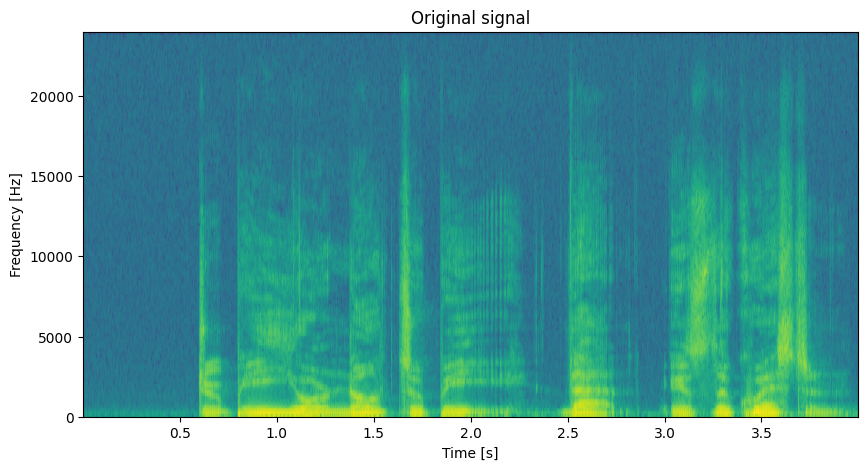

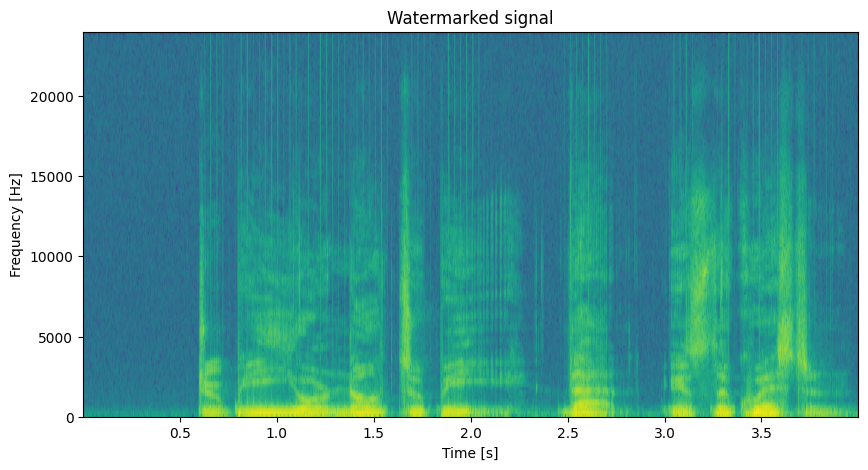

In [345]:
# Plot spectrogram of original and watermarked signal
plt.figure(figsize=(10, 5))
plt.specgram(hamlet_en, Fs=fs_hamlet)
plt.title("Original signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

plt.figure(figsize=(10, 5))
plt.specgram(watermarked_signal_dct, Fs=fs_hamlet)
plt.title("Watermarked signal")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.show()

In [346]:
watermarking_methods_df = pd.DataFrame.from_dict(watermarking_methods, orient='index')
watermarking_methods_df = watermarking_methods_df.round(2)
display(watermarking_methods_df)

SNR [dB]  BER [%]
fsvc           31.01     0.01
patchwork      34.51    23.73
norm_space      3.51     0.98
dct            13.12     0.56